Los datos publicados comienzan a partir de la fila 5. Además, la columna 5 está vacía, y las últimas filas hay que eliminarlas porque son una nota al pie.

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import chain
import math
import matplotlib.pyplot as plt
serie_mensual = './datos/serie_mensual_indices_comex.xls'
Intercambio_comercial = "./datos/Serie Intercambio comercial.csv"

desde = 2004
hasta = 2021

df = pd.read_excel(serie_mensual, header=None, skiprows = 5)
df= df.rename(columns = {0:'Año', 1: 'Mes', 2:'iv_x', 3:'ip_x', 4:'iq_x', 5:'del',6:'iv_m',7:'ip_m',8:'iq_m'})
df = df.drop(columns="del")
df = df[df['iv_x'].notna()]
df


,Año,Mes,iv_x,ip_x,iq_x,iv_m,ip_m,iq_m
0,2004,Enero,80.603953,97.863194,82.338631,85.999816,94.747514,90.765480
1,NaN,Febrero,83.123100,98.637791,84.271048,72.909655,95.365049,76.453102
2,NaN,Marzo,92.234875,98.699014,93.490321,90.356176,96.687437,93.481418
3,NaN,Abril,105.498772,101.221201,104.331206,88.261413,97.878611,90.232000
4,NaN,Mayo,117.807332,104.373216,113.006773,95.814740,99.755942,96.115957
...,...,...,...,...,...,...,...,...
210,NaN,Julio,251.687741,188.845469,133.277088,305.566499,131.812182,231.819619
211,NaN,Agosto,281.082321,188.625264,149.016264,307.609099,136.040804,226.115319
212,NaN,Septiembre,262.137604,189.164260,138.576708,314.682965,132.452925,237.383000
213,NaN,Octubre,238.175253,193.338718,123.190665,280.534623,132.264843,212.100674


In [3]:
#Más fácil para trabajar, lo hago todo lista
mes = df.Mes.tolist()
iv_x = df.iv_x.tolist()
ip_x = df.ip_x.tolist()
iq_x = df.iq_x.tolist()
iv_m = df.iv_m.tolist()
ip_m = df.ip_m.tolist()
iq_m = df.iq_m.tolist()
año = df.Año.tolist()

In [4]:
#Agarro los primeros 3 caracteres y los convierto en minúscula
mes_in=[]
for i in mes:
    mes_in.append(i[:3].lower())
mes_in[:2]

['ene', 'feb']

In [5]:
#Reemplazo el mes original
mes = mes_in[:]
mes[:2]

['ene', 'feb']

La columna año: los primeros 12 meses corresponde al 2004, los siguientes 12 al 2004+1. Para hasta que de el largo de los meses publicados.

In [6]:
#años=[]
#for año in df['Año'].to_list():
#    print(año)
#    if not math.isnan(año):
#        años.append[año]
#        año_anterior = año
#    else:
#        años.append(año_anterior)
#    
#    años[:13]

In [7]:
años=[]
arranque = int(df['Año'][0])
for i in range(len(mes)):
    if ((i % 12 == 0) and (i != 0)):       
        arranque+=1
        años.append(arranque)
    else:
        años.append(arranque)

años[:13]

[2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2005]

Calculo las medias por mes, hago listas y tengo que repetirlas dadas las observaciones.
Hay que tener en cuenta que están ordenadas por mes. La DF todavía no. 

Creo una df con el resto de las variables (falta ordenarlas)

In [8]:
mes_num=[]
for i in mes:
    if i == 'ene':
        num=1
    elif i == 'feb':
        num=2
    elif i == 'mar':
        num=3
    elif i == 'abr':
        num=4
    elif i == 'may':
        num=5
    elif i == 'jun':
        num=6
    elif i == 'jul':
        num=7
    elif i == 'ago':
        num=8
    elif i == 'sep':
        num=9
    elif i == 'oct':
        num=10
    elif i == 'nov':
        num=11
    elif i == 'dic':
        num=12
    mes_num.append(num)
len(mes_num)

215

In [9]:
df_todo = pd.DataFrame()
df_todo['Mes_num']=mes_num
df_todo['Mes']=mes
df_todo['Año']=años
df_todo['iv_x']=iv_x
df_todo['ip_x']=ip_x
df_todo['iq_x']=iq_x
df_todo['iv_m']=iv_m
df_todo['ip_m']=ip_m
df_todo['iq_m']=iq_m

df_todo = df_todo.loc[(df_todo['Año'] >= desde) & (df_todo['Año'] <= hasta)]
df_todo

,Mes_num,Mes,Año,iv_x,ip_x,iq_x,iv_m,ip_m,iq_m
0,1,ene,2004,80.603953,97.863194,82.338631,85.999816,94.747514,90.765480
1,2,feb,2004,83.123100,98.637791,84.271048,72.909655,95.365049,76.453102
2,3,mar,2004,92.234875,98.699014,93.490321,90.356176,96.687437,93.481418
3,4,abr,2004,105.498772,101.221201,104.331206,88.261413,97.878611,90.232000
4,5,may,2004,117.807332,104.373216,113.006773,95.814740,99.755942,96.115957
...,...,...,...,...,...,...,...,...,...
210,7,jul,2021,251.687741,188.845469,133.277088,305.566499,131.812182,231.819619
211,8,ago,2021,281.082321,188.625264,149.016264,307.609099,136.040804,226.115319
212,9,sep,2021,262.137604,189.164260,138.576708,314.682965,132.452925,237.383000
213,10,oct,2021,238.175253,193.338718,123.190665,280.534623,132.264843,212.100674


In [10]:
medias = df_todo.groupby(['Mes_num']).mean()
v_expo_media = medias.iv_x.tolist()
p_expo_media = medias.ip_x.tolist()
q_expo_media = medias.iq_x.tolist()
iv_impo_media = medias.iv_m.tolist()
p_impo_media = medias.ip_m.tolist()
q_impo_media = medias.iq_m.tolist()

del medias['Año']
medias

,iv_x,ip_x,iq_x,iv_m,ip_m,iq_m
Mes_num,,,,,,
1,147.924014,152.003232,97.294630,209.861516,118.414699,174.664071
2,145.730184,152.697208,95.243495,199.813691,120.467839,163.178401
3,163.638666,153.875927,106.245209,228.060957,122.164446,184.257528
4,182.921097,153.088729,119.243997,225.052416,123.496430,179.643302
5,200.213752,153.899631,129.580027,248.588212,125.224484,195.229521
6,192.354311,156.118546,122.081638,255.102614,126.563429,198.543844
7,193.858161,155.406432,123.759440,265.459872,125.421581,208.266043
8,199.457743,155.177877,127.121702,267.469141,124.327436,212.397582
9,189.880217,155.339964,121.333862,253.266065,121.922035,205.531817


In [11]:
cantidadMuestrasMes = Counter(df_todo['Mes'])
cantidadMuestrasMes

Counter({'ene': 18,
         'feb': 18,
         'mar': 18,
         'abr': 18,
         'may': 18,
         'jun': 18,
         'jul': 18,
         'ago': 18,
         'sep': 18,
         'oct': 18,
         'nov': 18,
         'dic': 17})

In [12]:
#Crear una variable que repita 12 veces cada mes. 
def lista_append_media(variable):
    lista = []
    for i in range(12):
        media = [variable[i]]*list(cantidadMuestrasMes.values())[i]
        lista.append(media)
    
    lista = list(chain(*lista))

    return lista

In [13]:
iv_expo_media_final = lista_append_media(v_expo_media)
p_expo_media_final = lista_append_media(p_expo_media)
q_expo_media_final = lista_append_media(q_expo_media)
iv_impo_media_final = lista_append_media(iv_impo_media)
p_impo_media_final = lista_append_media(p_impo_media)
q_impo_media_final = lista_append_media(q_impo_media)


In [14]:
df_todo_ordered=df_todo.sort_values(['Mes_num', 'Año'])
df_todo_ordered


,Mes_num,Mes,Año,iv_x,ip_x,iq_x,iv_m,ip_m,iq_m
0,1,ene,2004,80.603953,97.863194,82.338631,85.999816,94.747514,90.765480
12,1,ene,2005,96.522217,96.989939,99.591462,101.634537,105.293886,96.573232
24,1,ene,2006,110.627802,109.125542,101.462210,124.229487,110.539559,112.378030
36,1,ene,2007,117.639152,123.757389,95.078776,157.772613,116.177661,135.771818
48,1,ene,2008,201.933355,163.037740,123.647278,239.437040,124.612952,192.005012
...,...,...,...,...,...,...,...,...,...
155,12,dic,2016,161.365707,151.779159,106.302848,245.653036,117.143430,209.451522
167,12,dic,2017,158.900611,158.509548,100.143845,286.880641,118.029568,242.571984
179,12,dic,2018,185.207845,152.453599,121.472761,209.409171,120.012585,174.433438
191,12,dic,2019,186.512311,152.107463,121.946692,167.504137,114.317594,145.718613


In [15]:
df_todo_ordered['iv_expo_media']= iv_expo_media_final
df_todo_ordered['p_expo_media']= p_expo_media_final
df_todo_ordered['q_expo_media']= q_expo_media_final
df_todo_ordered['iv_impo_media']= iv_impo_media_final
df_todo_ordered['p_impo_media']= p_impo_media_final
df_todo_ordered['q_impo_media']= q_impo_media_final
df_todo_ordered = df_todo_ordered.reset_index(drop=True)
df_todo_ordered

,Mes_num,Mes,Año,iv_x,ip_x,iq_x,iv_m,ip_m,iq_m,iv_expo_media,p_expo_media,q_expo_media,iv_impo_media,p_impo_media,q_impo_media
0,1,ene,2004,80.603953,97.863194,82.338631,85.999816,94.747514,90.765480,147.924014,152.003232,97.294630,209.861516,118.414699,174.664071
1,1,ene,2005,96.522217,96.989939,99.591462,101.634537,105.293886,96.573232,147.924014,152.003232,97.294630,209.861516,118.414699,174.664071
2,1,ene,2006,110.627802,109.125542,101.462210,124.229487,110.539559,112.378030,147.924014,152.003232,97.294630,209.861516,118.414699,174.664071
3,1,ene,2007,117.639152,123.757389,95.078776,157.772613,116.177661,135.771818,147.924014,152.003232,97.294630,209.861516,118.414699,174.664071
4,1,ene,2008,201.933355,163.037740,123.647278,239.437040,124.612952,192.005012,147.924014,152.003232,97.294630,209.861516,118.414699,174.664071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,12,dic,2016,161.365707,151.779159,106.302848,245.653036,117.143430,209.451522,163.584865,153.602663,106.735025,220.606514,121.475202,179.690802
211,12,dic,2017,158.900611,158.509548,100.143845,286.880641,118.029568,242.571984,163.584865,153.602663,106.735025,220.606514,121.475202,179.690802
212,12,dic,2018,185.207845,152.453599,121.472761,209.409171,120.012585,174.433438,163.584865,153.602663,106.735025,220.606514,121.475202,179.690802
213,12,dic,2019,186.512311,152.107463,121.946692,167.504137,114.317594,145.718613,163.584865,153.602663,106.735025,220.606514,121.475202,179.690802


#Sistema de consulta

In [16]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import chain

### Loop the data lines
with open(Intercambio_comercial, 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in temp_f.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = ['Año', 'Mes', 'v_expo', 'v_impo','Intercambio_comercial']

### Read csv
df_consulta = pd.read_csv(Intercambio_comercial, header=None, delimiter=";", names=column_names, skiprows = 1)
df_consulta

,Año,Mes,v_expo,v_impo,Intercambio_comercial
0,2002,1,1817821769,850579913,2668401682
1,2002,2,1781933597,627759578,2409693175
2,2002,3,2112397988,592890030,2705288018
3,2002,4,2181683896,612000097,2793683993
4,2002,5,2369474217,861772801,3231247018
...,...,...,...,...,...
234,2021,7,"7251906933,18","5715438377,69","12967345310,87"
235,2021,8,"8098856231,98","5753643988,37","13852500220,35"
236,2021,9,"7570189290,44","5885682051,41","13455871341,85"
237,2021,10,"6862570097,27","5247232136,26","12109802233,53"


In [17]:
#Filtro
df_consulta_fil= df_consulta.loc[(df_consulta['Año'] >= desde)&(df_consulta['Año'] <= hasta)]
df_consulta_fil


,Año,Mes,v_expo,v_impo,Intercambio_comercial
24,2004,1,2322450679,1608575067,3931025746
25,2004,2,2395035139,1363731431,3758766570
26,2004,3,2657573743,1690058163,4347631906
27,2004,4,3039747864,1650876869,4690624733
28,2004,5,3394395773,1792157340,5186553113
...,...,...,...,...,...
234,2021,7,"7251906933,18","5715438377,69","12967345310,87"
235,2021,8,"8098856231,98","5753643988,37","13852500220,35"
236,2021,9,"7570189290,44","5885682051,41","13455871341,85"
237,2021,10,"6862570097,27","5247232136,26","12109802233,53"


In [18]:
#Orden
df_consulta_ordered=df_consulta_fil.sort_values(['Mes', 'Año'])
df_consulta_ordered

,Año,Mes,v_expo,v_impo,Intercambio_comercial
24,2004,1,2322450679,1608575067,3931025746
36,2005,1,2781099868,1900999864,4682099732
48,2006,1,3187525144,2323623634,5511148778
60,2007,1,3389543360,2951026758,6340570118
72,2008,1,5818321876,4478510458,10296832334
...,...,...,...,...,...
179,2016,12,4649443384,4594778166,9244221550
191,2017,12,"4578420998,7","5365930590,37","9944351589,07"
203,2018,12,"5336414286,93","3916873146,04","9253287432,97"
215,2019,12,"5374345379,88","3133064583,35","8507409963,23"


In [19]:
#Para trabajar más facil
X = df_consulta_ordered.v_expo.tolist()
M = df_consulta_ordered.v_impo.tolist()
IC = df_consulta_ordered.Intercambio_comercial.tolist()

In [20]:
#Para poder dividir por 1 millón
def col_float(variable,lista):
    str(variable)
    for i in variable:
        replace = float(i.replace(',','.'))/1000000
        lista.append(replace)

In [21]:
Expo_float=[]
Impo_float=[]
Inter_float=[]
col_float(X,Expo_float)
col_float(M,Impo_float)
col_float(IC,Inter_float)

len(Expo_float)

215

In [22]:
df_consulta_ordered['v_expo']=Expo_float
df_consulta_ordered['v_impo']=Impo_float
df_consulta_ordered['Intercambio_comercial']=Inter_float
df_consulta_ordered

,Año,Mes,v_expo,v_impo,Intercambio_comercial
24,2004,1,2322.450679,1608.575067,3931.025746
36,2005,1,2781.099868,1900.999864,4682.099732
48,2006,1,3187.525144,2323.623634,5511.148778
60,2007,1,3389.543360,2951.026758,6340.570118
72,2008,1,5818.321876,4478.510458,10296.832334
...,...,...,...,...,...
179,2016,12,4649.443384,4594.778166,9244.221550
191,2017,12,4578.420999,5365.930590,9944.351589
203,2018,12,5336.414287,3916.873146,9253.287433
215,2019,12,5374.345380,3133.064583,8507.409963


In [23]:
#Calculo medias
medias = df_consulta_ordered.groupby(['Mes']).mean()
v_expo_mediaa = medias.v_expo.tolist()
v_impo_mediaa = medias.v_impo.tolist()
ic_mediaa = medias.Intercambio_comercial.tolist()
medias

,Año,v_expo,v_impo,Intercambio_comercial
Mes,,,,
1,2012.5,4262.147383,3925.324365,8187.471747
2,2012.5,4198.936321,3737.386253,7936.322574
3,2012.5,4714.935158,4265.733996,8980.669154
4,2012.5,5270.521954,4209.461132,9479.983086
5,2012.5,5768.777034,4649.683930,10418.460965
6,2012.5,5542.322147,4771.531897,10313.854044
7,2012.5,5585.652630,4965.257955,10550.910585
8,2012.5,5746.994055,5002.840085,10749.834140
9,2012.5,5471.990632,4737.164842,10209.155474


In [24]:
v_expo_media = lista_append_media(v_expo_mediaa)
v_impo_media = lista_append_media(v_impo_mediaa)
ic_media = lista_append_media(ic_mediaa)


In [25]:
df_consulta_ordered['v_expo_media']=v_expo_media
df_consulta_ordered['v_impo_media']=v_impo_media
df_consulta_ordered['v_ic_media']=ic_media

In [26]:
df_consulta_wr=df_consulta_ordered[['v_expo', 'v_expo_media','v_impo', 'v_impo_media','Intercambio_comercial', 'v_ic_media']]
df_consulta_wr = df_consulta_wr.reset_index(drop=True)
df_consulta_wr

,v_expo,v_expo_media,v_impo,v_impo_media,Intercambio_comercial,v_ic_media
0,2322.450679,4262.147383,1608.575067,3925.324365,3931.025746,8187.471747
1,2781.099868,4262.147383,1900.999864,3925.324365,4682.099732,8187.471747
2,3187.525144,4262.147383,2323.623634,3925.324365,5511.148778,8187.471747
3,3389.543360,4262.147383,2951.026758,3925.324365,6340.570118,8187.471747
4,5818.321876,4262.147383,4478.510458,3925.324365,10296.832334,8187.471747
...,...,...,...,...,...,...
210,4649.443384,4713.408952,4594.778166,4126.302437,9244.221550,8839.711389
211,4578.420999,4713.408952,5365.930590,4126.302437,9944.351589,8839.711389
212,5336.414287,4713.408952,3916.873146,4126.302437,9253.287433,8839.711389
213,5374.345380,4713.408952,3133.064583,4126.302437,8507.409963,8839.711389


#Unión

In [27]:
df_estacional = pd.concat([df_todo_ordered, df_consulta_wr], axis=1)
df_estacional = df_estacional.rename(columns={'ip_x': 'p_expo', 'iq_x': 'q_expo', 'ip_m': 'p_impo', 'iq_m': 'q_impo'})
df_estacional

,Mes_num,Mes,Año,iv_x,p_expo,q_expo,iv_m,p_impo,q_impo,iv_expo_media,...,q_expo_media,iv_impo_media,p_impo_media,q_impo_media,v_expo,v_expo_media,v_impo,v_impo_media,Intercambio_comercial,v_ic_media
0,1,ene,2004,80.603953,97.863194,82.338631,85.999816,94.747514,90.765480,147.924014,...,97.294630,209.861516,118.414699,174.664071,2322.450679,4262.147383,1608.575067,3925.324365,3931.025746,8187.471747
1,1,ene,2005,96.522217,96.989939,99.591462,101.634537,105.293886,96.573232,147.924014,...,97.294630,209.861516,118.414699,174.664071,2781.099868,4262.147383,1900.999864,3925.324365,4682.099732,8187.471747
2,1,ene,2006,110.627802,109.125542,101.462210,124.229487,110.539559,112.378030,147.924014,...,97.294630,209.861516,118.414699,174.664071,3187.525144,4262.147383,2323.623634,3925.324365,5511.148778,8187.471747
3,1,ene,2007,117.639152,123.757389,95.078776,157.772613,116.177661,135.771818,147.924014,...,97.294630,209.861516,118.414699,174.664071,3389.543360,4262.147383,2951.026758,3925.324365,6340.570118,8187.471747
4,1,ene,2008,201.933355,163.037740,123.647278,239.437040,124.612952,192.005012,147.924014,...,97.294630,209.861516,118.414699,174.664071,5818.321876,4262.147383,4478.510458,3925.324365,10296.832334,8187.471747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,12,dic,2016,161.365707,151.779159,106.302848,245.653036,117.143430,209.451522,163.584865,...,106.735025,220.606514,121.475202,179.690802,4649.443384,4713.408952,4594.778166,4126.302437,9244.221550,8839.711389
211,12,dic,2017,158.900611,158.509548,100.143845,286.880641,118.029568,242.571984,163.584865,...,106.735025,220.606514,121.475202,179.690802,4578.420999,4713.408952,5365.930590,4126.302437,9944.351589,8839.711389
212,12,dic,2018,185.207845,152.453599,121.472761,209.409171,120.012585,174.433438,163.584865,...,106.735025,220.606514,121.475202,179.690802,5336.414287,4713.408952,3916.873146,4126.302437,9253.287433,8839.711389
213,12,dic,2019,186.512311,152.107463,121.946692,167.504137,114.317594,145.718613,163.584865,...,106.735025,220.606514,121.475202,179.690802,5374.345380,4713.408952,3133.064583,4126.302437,8507.409963,8839.711389


In [28]:
df_estacional.to_excel("./outputs/datossss.xlsx",  engine='xlsxwriter', index=False)

In [29]:
def puntoyComa(a):
  return '{:,}'.format(a).replace(',','~').replace('.',',').replace('~','.')

In [30]:
#sacamos una lista con la cantidad acumulada de muestras por mes, mas adelante eso va a ser la posicion de los xticks
def acumula_muestras (distancias):
    distancias_acum = [0]
    for distancia in list(distancias.keys()):
        distancias_acum.append(distancias[distancia])
    distancias_acum = np.add.accumulate(distancias_acum).tolist()
    return distancias_acum

muestrasxMes_acum = acumula_muestras(cantidadMuestrasMes)

In [31]:
#Funcion que agrega NaN para correr las muestras horizontalmente
def corrimientoMuestras(datos, promedio):
  datos_corridos = segmenta(datos)
  meida_corrida = segmenta(promedio)
  for i in range(12):
    for x in range(muestrasxMes_acum[i]):
      datos_corridos[i].insert(x, None)
      meida_corrida[i].insert(x, None)
  return datos_corridos, meida_corrida

def segmenta(lista):
  #Separa las listas en una lista que contiene nuevas listas por mes
  listaMeses=[]

  for i in range(12):
    listaMeses.append(lista[muestrasxMes_acum[i]:muestrasxMes_acum[i+1]])
  
  return listaMeses

  #Extraemos solo los valores del 2021
def ultimoanio(datos):
  segmentado = segmenta(datos)
  ultianio = []
  for mes in segmentado:
    ultianio.append(mes[-1])
  return ultianio

In [32]:
def maxMinLista (val):
  segmentado = segmenta(val)
  extremosEstac = []
  for mes in segmentado:
    max_val = max(mes)
    max_idx = mes.index(max_val)
    min_val = min(mes)
    min_idx = mes.index(min_val)
    maxi = (max_val,max_idx)
    mini = (min_val,min_idx)
    media = sum(mes)/len(mes)

    #Cuartiles
    mes_sin_nan = []
    for v in mes:
      if(not math.isnan(v)):
        mes_sin_nan.append(v)
    qs = list(np.quantile(mes_sin_nan, [0.25, 0.5, 0.75]))
    q1s = qs[0]
    q2s = qs[1]
    q3s = qs[2]
    extremosEstac.append([maxi,mini,media,q1s,q2s,q3s])
  
  #Aca traspongo la matriz para que coincida con el formato de matplotlib
  extremosEstac = list(zip(*extremosEstac[::-1]))
  for i, ex in enumerate(extremosEstac):
    extremosEstac[i] = list(extremosEstac[i])
    extremosEstac[i].reverse()
  return extremosEstac



In [33]:
#determino el ancho de las columnas
col_width = []
muestrasxMes = list(cantidadMuestrasMes.values())
for muestra in muestrasxMes:
  col_width.append(muestra/sum(muestrasxMes))


In [34]:
def datosTabla(datos, ultiAnio):
    anios = list(Counter(df_estacional.Año.to_list()).keys())
    tabla = maxMinLista(datos)
    out = [[],[],[],[],[],[],[]]
    for max in tabla[0]:
        numeros = puntoyComa(round(max[0]))
        out[0].append(f'{numeros} ({anios[max[1]]})')
    for min in tabla[1]:
        numeros = puntoyComa(round(min[0]))
        out[1].append(f'{numeros} ({anios[min[1]]})')
    for prom in tabla[2]:
        if (math.isnan(prom)):
            prom = '--'
        else:
            numeros = puntoyComa(round(prom))
        out[2].append(str(numeros))
        
    #agregamos una fila con los valores del 2021
    for val in ultiAnio:
        if (math.isnan(val)):
            redondo = '--'
        else:
            redondo = puntoyComa(round(val))
        out[3].append(redondo)


    #agregamos los cuartiles

    for q1 in tabla[3]:
        out[4].append(puntoyComa(round(q1)))
    for q2 in tabla[4]:
        out[5].append(puntoyComa(round(q2)))
    for q3 in tabla[5]:
        out[6].append(puntoyComa(round(q3)))
        
    return out

In [35]:
def hace_tabla (ax, datos, col_width):
        
        lista_meses = list(cantidadMuestrasMes.keys())

        tabla = ax.table(
                datosTabla(datos, ultimoanio(datos)),
                colLabels=lista_meses,
                rowLabels=['Máx','Min','Prom','2021', 'Q1', 'Q2', 'Q3'],
                colWidths=col_width,
                bbox=[0, -0.28, 1, 0.275],
                )

        tabla.auto_set_font_size(False)
        tabla.set_fontsize(12)

        return tabla

def hace_grafo(ax1, dat1, med1, ax2, dat2, med2):
    dat1= dat1.to_list()
    dat2= dat2.to_list()
    med1= med1.to_list()
    med2= med2.to_list()


    datos_corridos1, media_corrida1 = corrimientoMuestras(dat1, med1)
    datos_corridos2, media_corrida2 = corrimientoMuestras(dat2, med2)


    for i in range(12):
        ax1.plot(datos_corridos1[i], color = "gold")
        ax1.plot(media_corrida1[i], color = "blueviolet")
    
    for i in range(12):
        ax2.plot(datos_corridos2[i], color = "blueviolet")
        ax2.plot(media_corrida2[i], color = "gold")
    #dibujo lineas verticales por mes
    for muestras in muestrasxMes_acum:
        ax1.axvline(muestras, color='grey', linestyle='--' )
        ax2.axvline(muestras, color='grey', linestyle='--' )
        
    ax1.set_xmargin(0)
    ax2.set_xmargin(0)
    ax1.set_xticks([])
    ax2.set_xticks([])
    
    #agrega las tablas
    hace_tabla(ax1, dat1, col_width)
    hace_tabla(ax2, dat2, col_width)

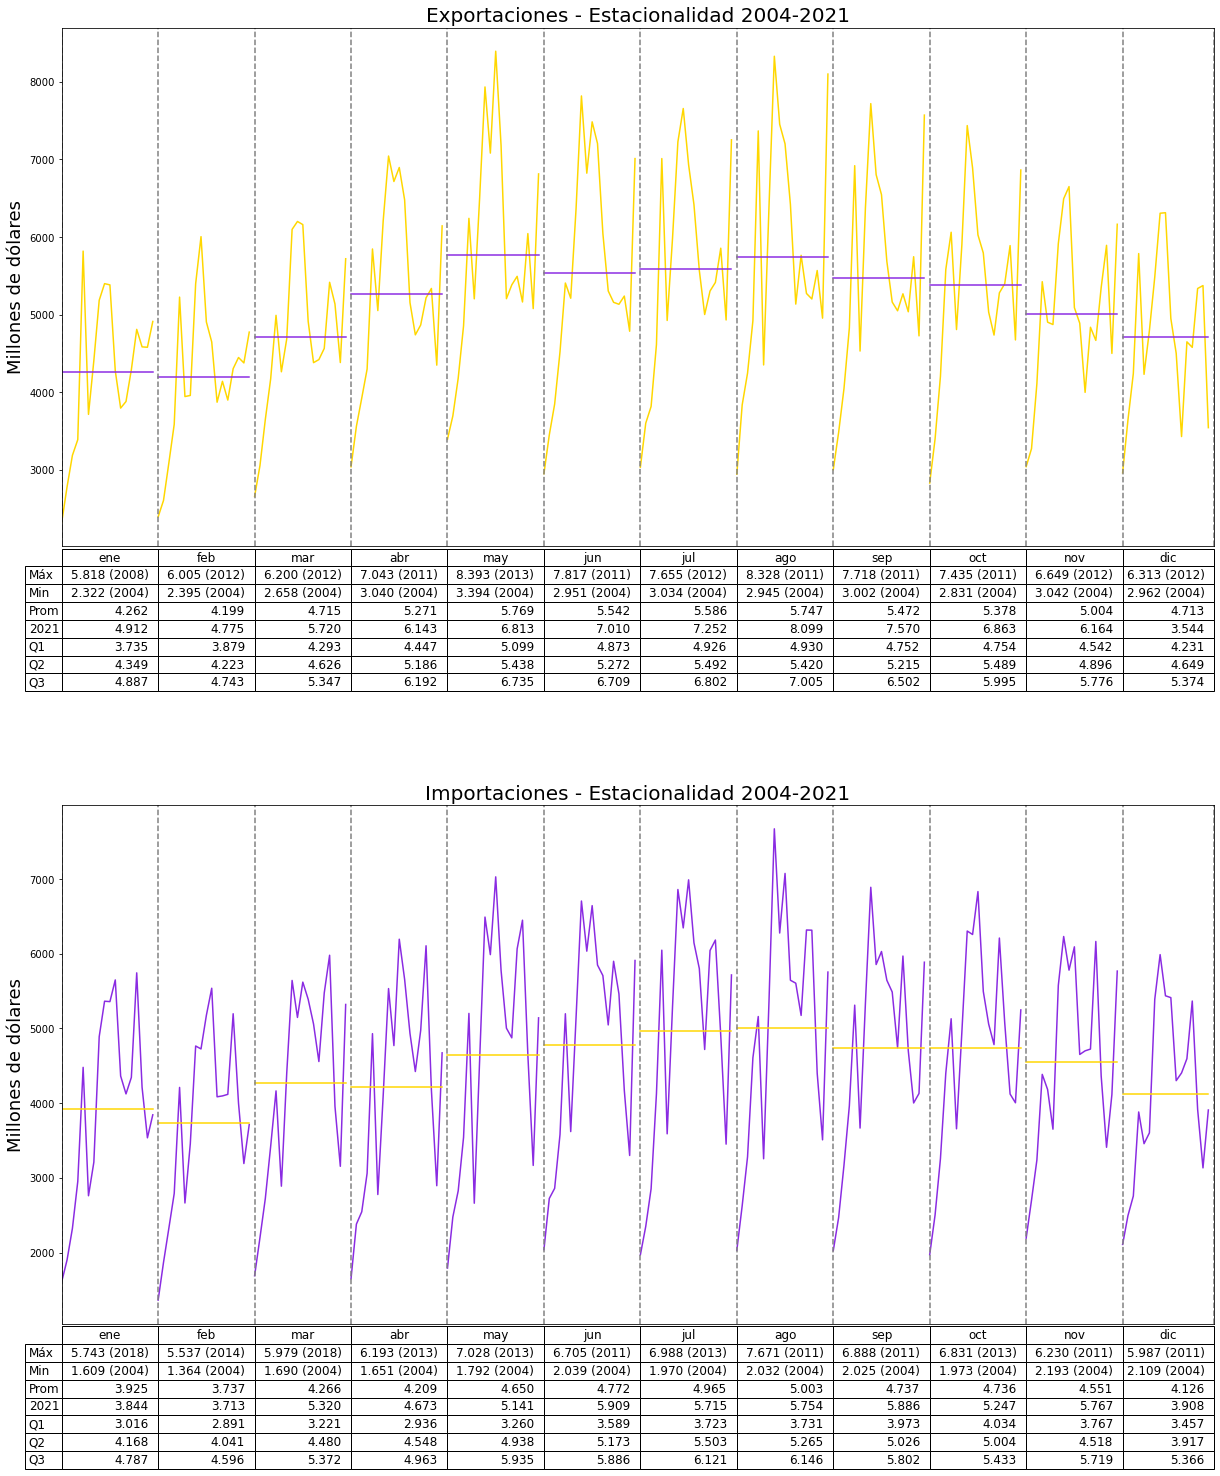

In [36]:
#Valores IMPO y EXPO
fig_valores, (ax_v_expo, ax_v_impo) = plt.subplots(2)
fig_valores.set_size_inches(20,20)

hace_grafo(ax_v_expo, df_estacional.v_expo, df_estacional.v_expo_media, ax_v_impo, df_estacional.v_impo, df_estacional.v_impo_media)

#Algunos ajustes de tamaño de letra etc
ax_v_expo.set_ylabel('Millones de dólares', fontsize = 18)
ax_v_impo.set_ylabel('Millones de dólares', fontsize = 18)
ax_v_expo.set_title(f'Exportaciones - Estacionalidad {desde}-{hasta}', fontsize = 20)

ax_v_impo.set_title(f'Importaciones - Estacionalidad {desde}-{hasta}', fontsize = 20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.5)


#Imprimo

plt.show()


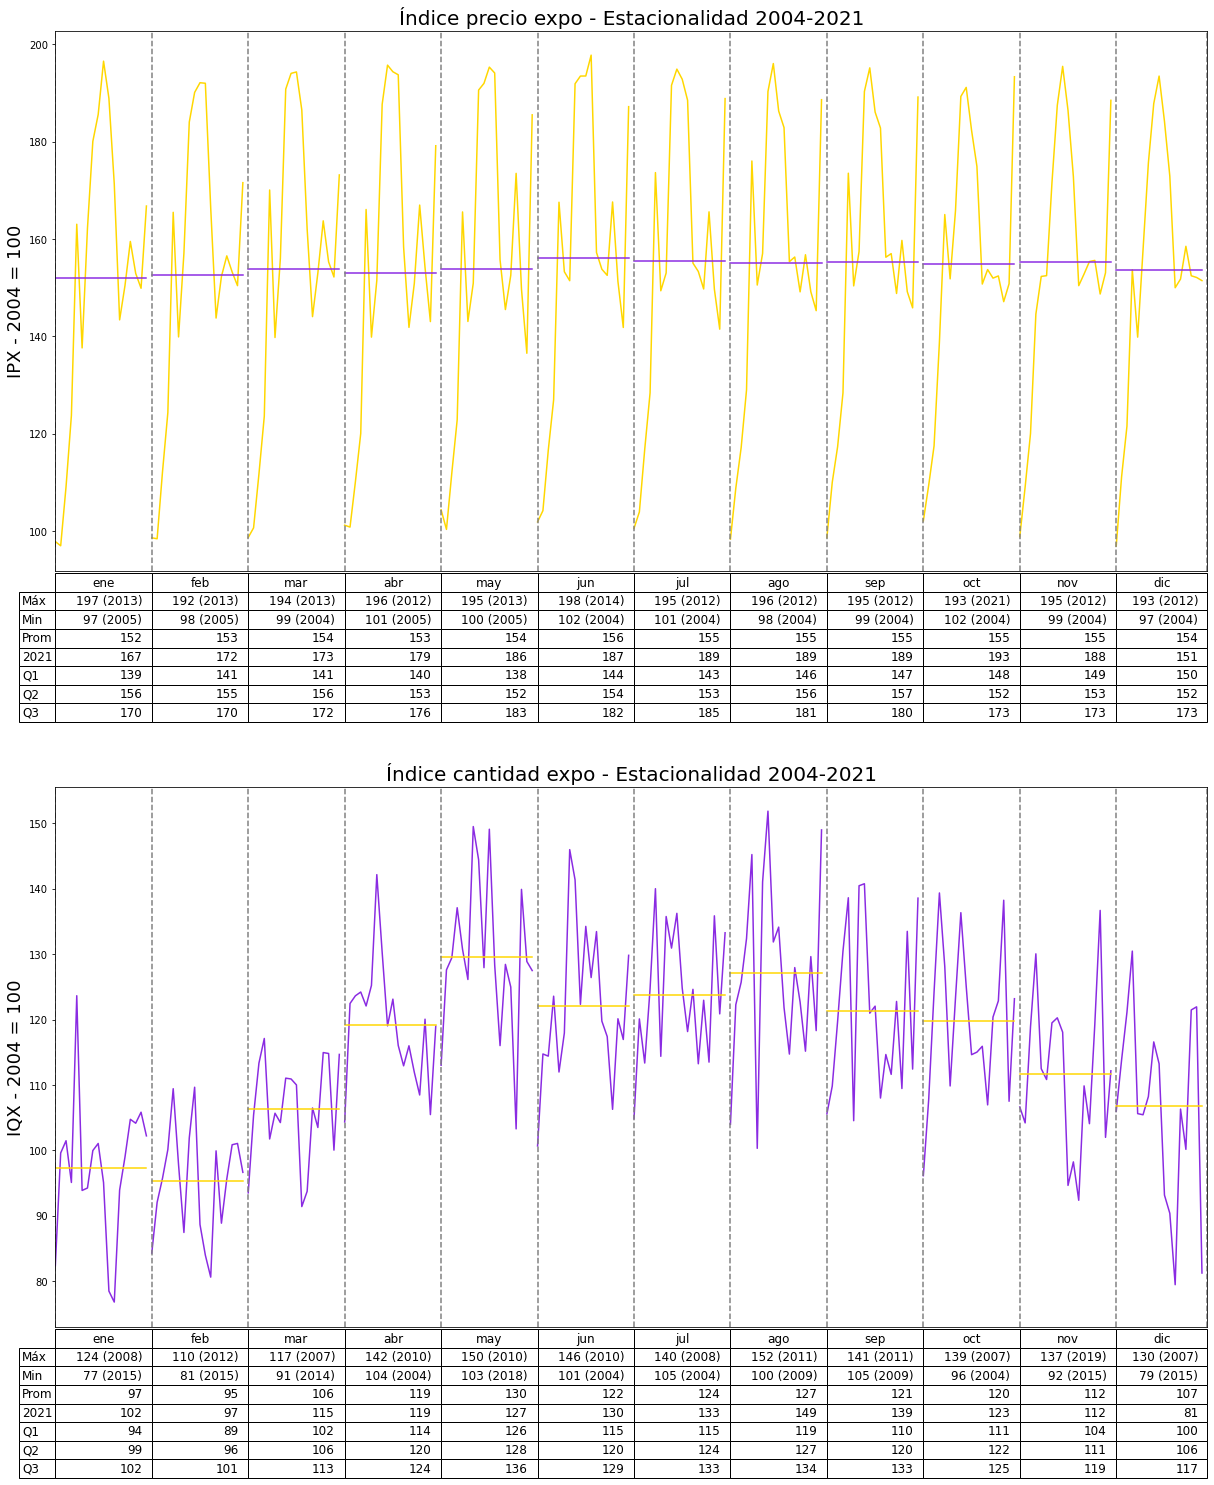

In [37]:
#Precios y cantidades EXPO
#Valores IMPO y EXPO
fig_i_expo, (ax_p_expo, ax_q_expo) = plt.subplots(2)
fig_i_expo.set_size_inches(20,20)

hace_grafo(ax_p_expo, df_estacional.p_expo, df_estacional.p_expo_media, ax_q_expo, df_estacional.q_expo, df_estacional.q_expo_media)

#Algunos ajustes de tamaño de letra etc
ax_p_expo.set_ylabel('IPX - 2004 = 100', fontsize = 18)
ax_q_expo.set_ylabel('IQX - 2004 = 100', fontsize = 18)


ax_p_expo.set_title(f'Índice precio expo - Estacionalidad {desde}-{hasta}', fontsize = 20)

ax_q_expo.set_title(f'Índice cantidad expo - Estacionalidad {desde}-{hasta}', fontsize = 20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)


#Imprimo

plt.show()

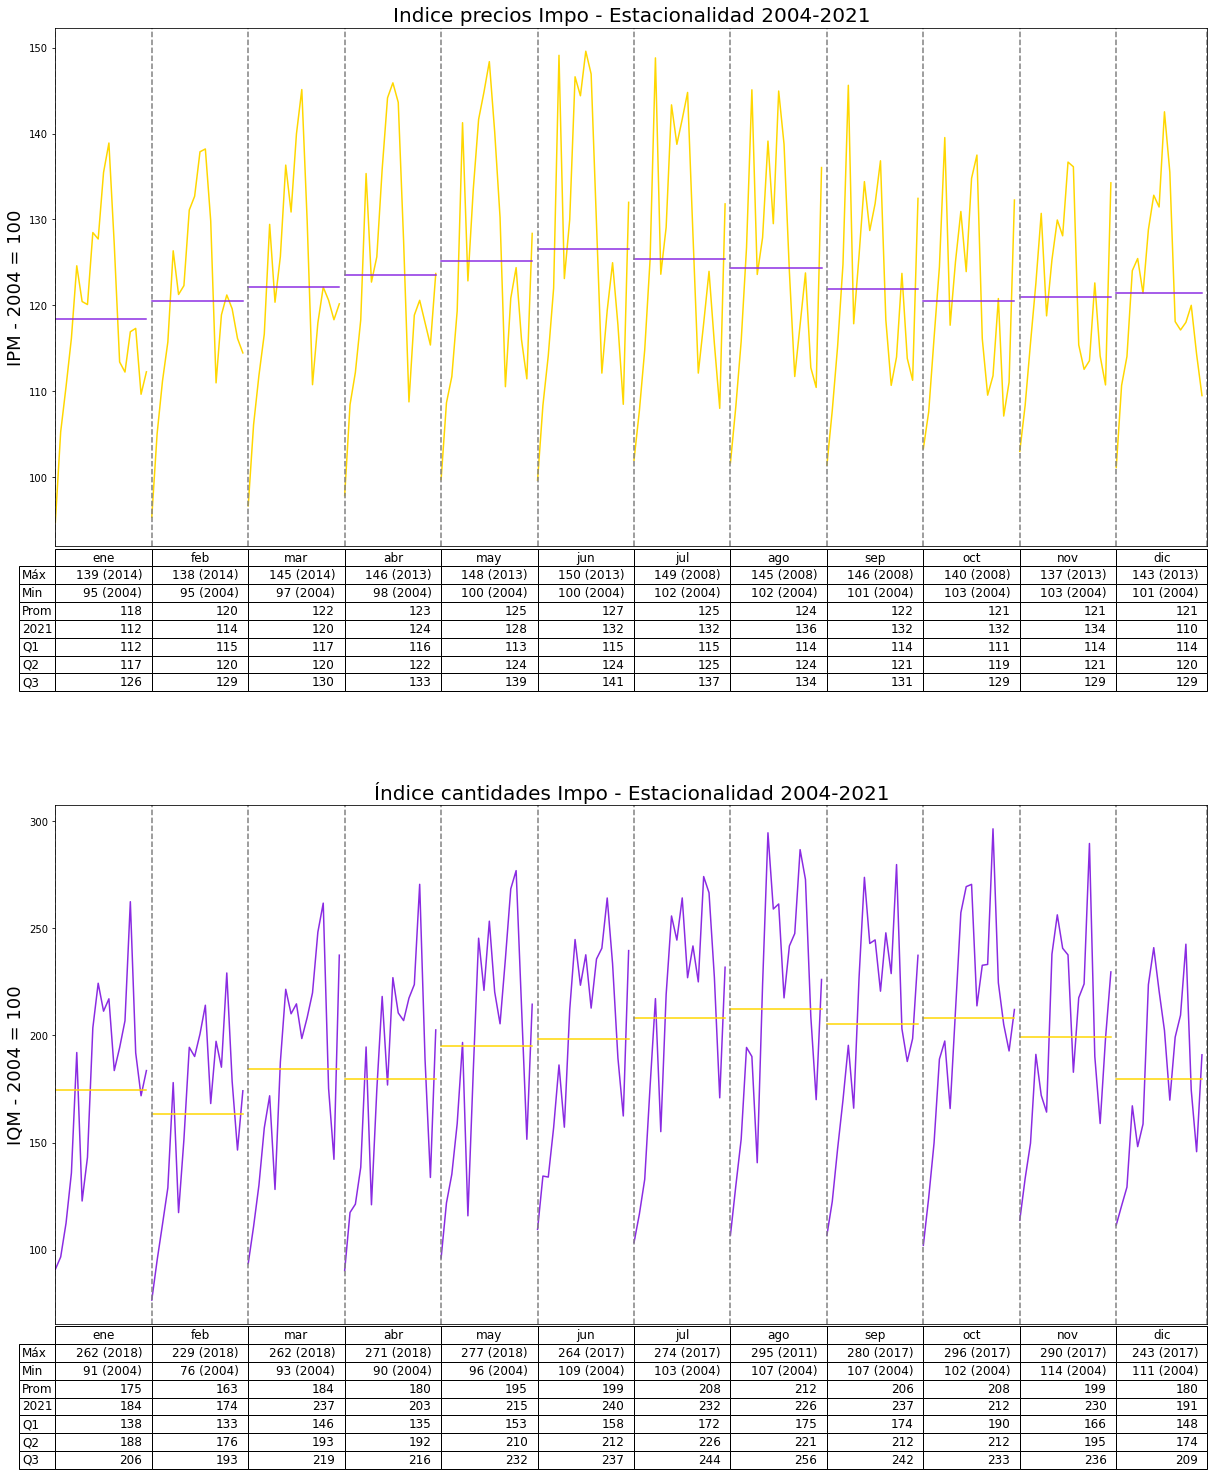

In [38]:
#Precios y cantidades IMPO

fig_i_impo, (ax_p_impo, ax_q_impo) = plt.subplots(2)
fig_i_impo.set_size_inches(20,20)

hace_grafo(ax_p_impo, df_estacional.p_impo, df_estacional.p_impo_media, ax_q_impo, df_estacional.q_impo, df_estacional.q_impo_media)

#Algunos ajustes de tamaño de letra etc
ax_p_impo.set_ylabel('IPM - 2004 = 100', fontsize = 18)
ax_q_impo.set_ylabel('IQM - 2004 = 100', fontsize = 18)
ax_p_impo.set_title(f'Indice precios Impo - Estacionalidad {desde}-{hasta}', fontsize = 20)

ax_q_impo.set_title(f'Índice cantidades Impo - Estacionalidad {desde}-{hasta}', fontsize = 20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.5)


#Imprimo

plt.show()

In [39]:
fig_valores.savefig('./outputs/Estacionalidad de valores Impo-Expo.pdf', transparent=False, dpi=300, bbox_inches = "tight")
fig_i_expo.savefig('./outputs/Estacionalidad de IPX-IQX.pdf', transparent=False,dpi=300, bbox_inches = "tight")
fig_i_impo.savefig('./outputs/Estacionalidad de IPM-IQM.pdf', transparent=False,dpi=300, bbox_inches = "tight")